**DENGAN ELBOW 4**

Kelompok 8

1) FARISAH GHASSANI HASYYATI - 24060122140137

2) FARID RAHMAN FADHILAH - 24060122140142

3) AURELLIA PUTRI BUDI ARSYANINGRUM - 24060122140168

4) NABILA NAJMA MANIKA - 24060122140172

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
from scipy import stats
from scipy.stats import mstats
from scipy.spatial.distance import cdist
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

**Membaca Dataset yang memiliki jumlah datanya 100 serta fiturnya terdapat 13**

In [5]:
df = pd.read_csv('weight_change_dataset.csv')
df.shape

(100, 13)

**TAHAPAN EDA**

Exploratory Data Analysis (EDA) digunakan untuk memahami, menganalisis, dan mengeksplorasi dataset sebelum melakukan pemodelan atau analisis lanjutan. Tujuan utamanya adalah untuk memperoleh wawasan awal dari data, mengidentifikasi pola, menemukan anomali, serta memastikan kualitas data untuk mendukung pengambilan keputusan.

In [6]:
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


**Dari Info data diketahui terdapat datatype dengan tipe : 4 int, 6 float, dan 3 object**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

**Diketahui tidak terdapat data yang kosong**

In [8]:
df.isnull().sum()

,0
Participant ID,0
Age,0
Gender,0
Current Weight (lbs),0
BMR (Calories),0
Daily Calories Consumed,0
Daily Caloric Surplus/Deficit,0
Weight Change (lbs),0
Duration (weeks),0
Physical Activity Level,0


**Tidak terdapat duplikasi data**

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Participant ID,100.0,50.500000,29.011492,1.000000,25.750000,50.50,75.250,100.0
Age,100.0,37.910000,12.219454,18.000000,26.750000,38.00,46.250,59.0
Current Weight (lbs),100.0,171.533000,30.333856,100.000000,153.650000,172.15,192.475,238.2
BMR (Calories),100.0,2518.206000,364.431221,1566.500000,2255.050000,2519.50,2805.975,3390.8
Daily Calories Consumed,100.0,3518.292000,513.313097,2030.900000,3233.300000,3636.05,4000.000,4000.0
Daily Caloric Surplus/Deficit,100.0,1000.091000,371.560827,82.500000,766.950000,1013.10,1253.325,1922.5
Weight Change (lbs),100.0,-2.779817,7.443719,-35.678115,-5.012312,0.10,1.850,5.0
Duration (weeks),100.0,6.920000,3.515277,1.000000,4.000000,7.00,10.000,12.0
Stress Level,100.0,4.810000,2.576879,1.000000,2.750000,5.00,7.000,9.0
Final Weight (lbs),100.0,168.750000,30.588004,98.200000,149.550000,169.80,188.300,232.5


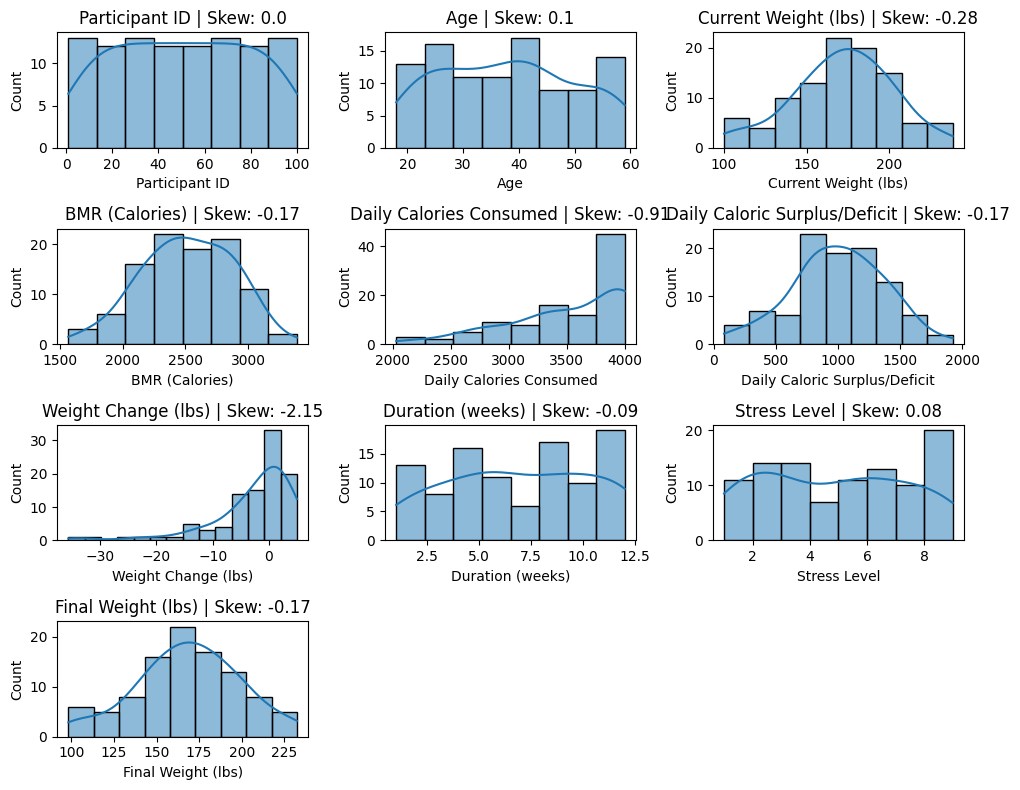

In [11]:
numeric_columns = df.select_dtypes(include=np.number).columns
num_cols = 3
num_rows = (len(numeric_columns) // num_cols) + (1 if len(numeric_columns) % num_cols != 0 else 0)
plt.figure(figsize=(10, num_rows * 2))

for idx, feature in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skew: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

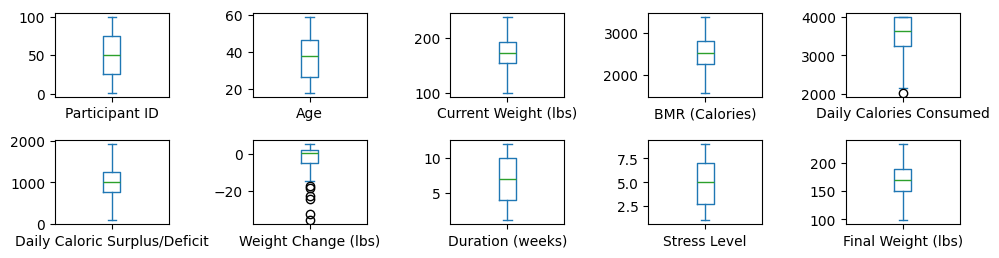

In [12]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

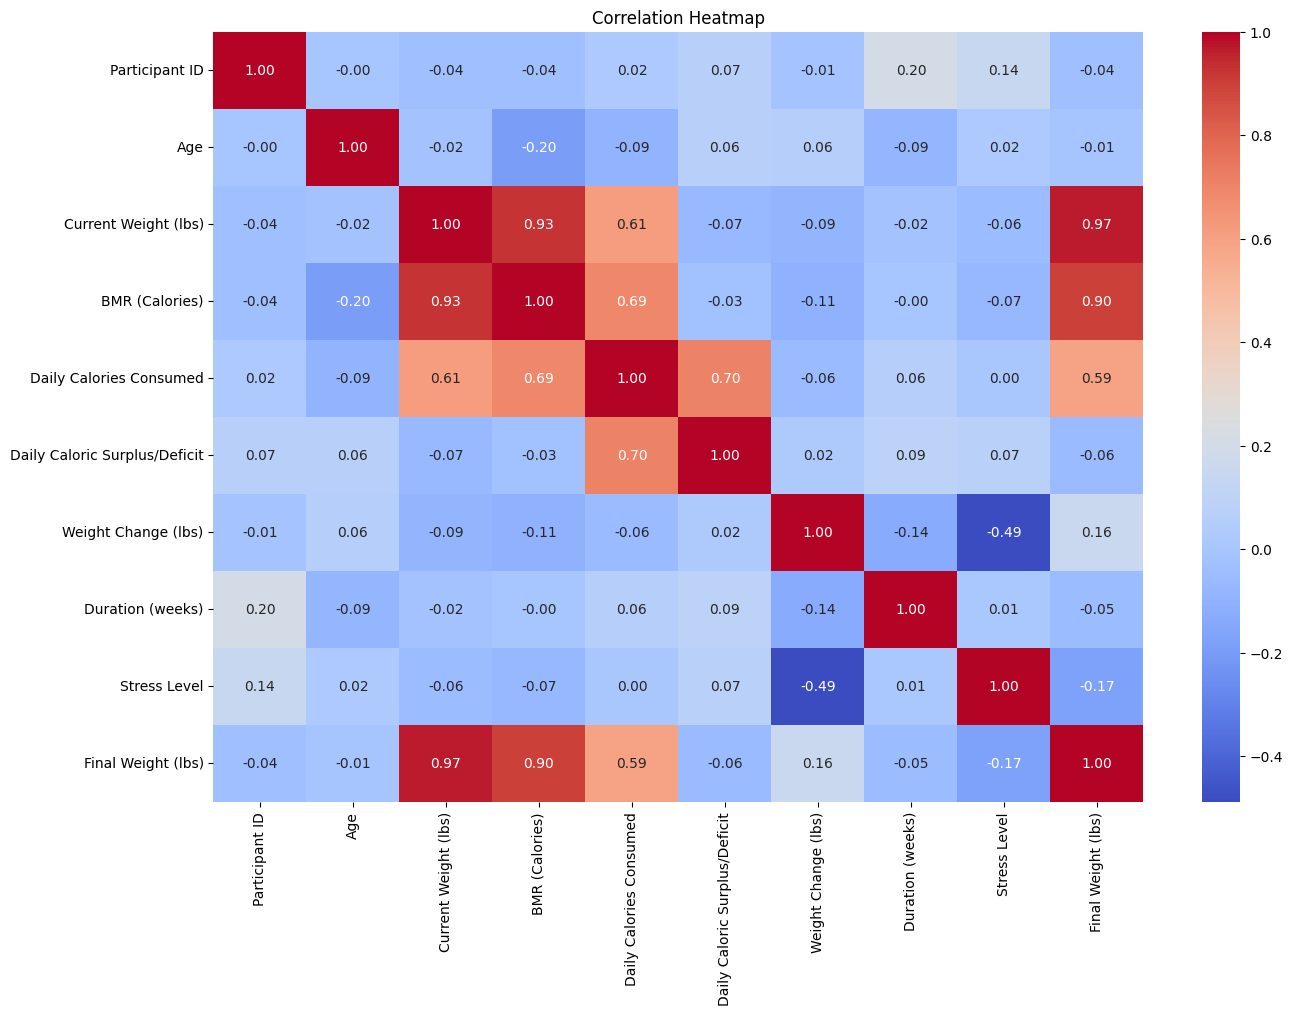

In [13]:
data_numeric = df.select_dtypes(include=['number'])
corr_matrix = data_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

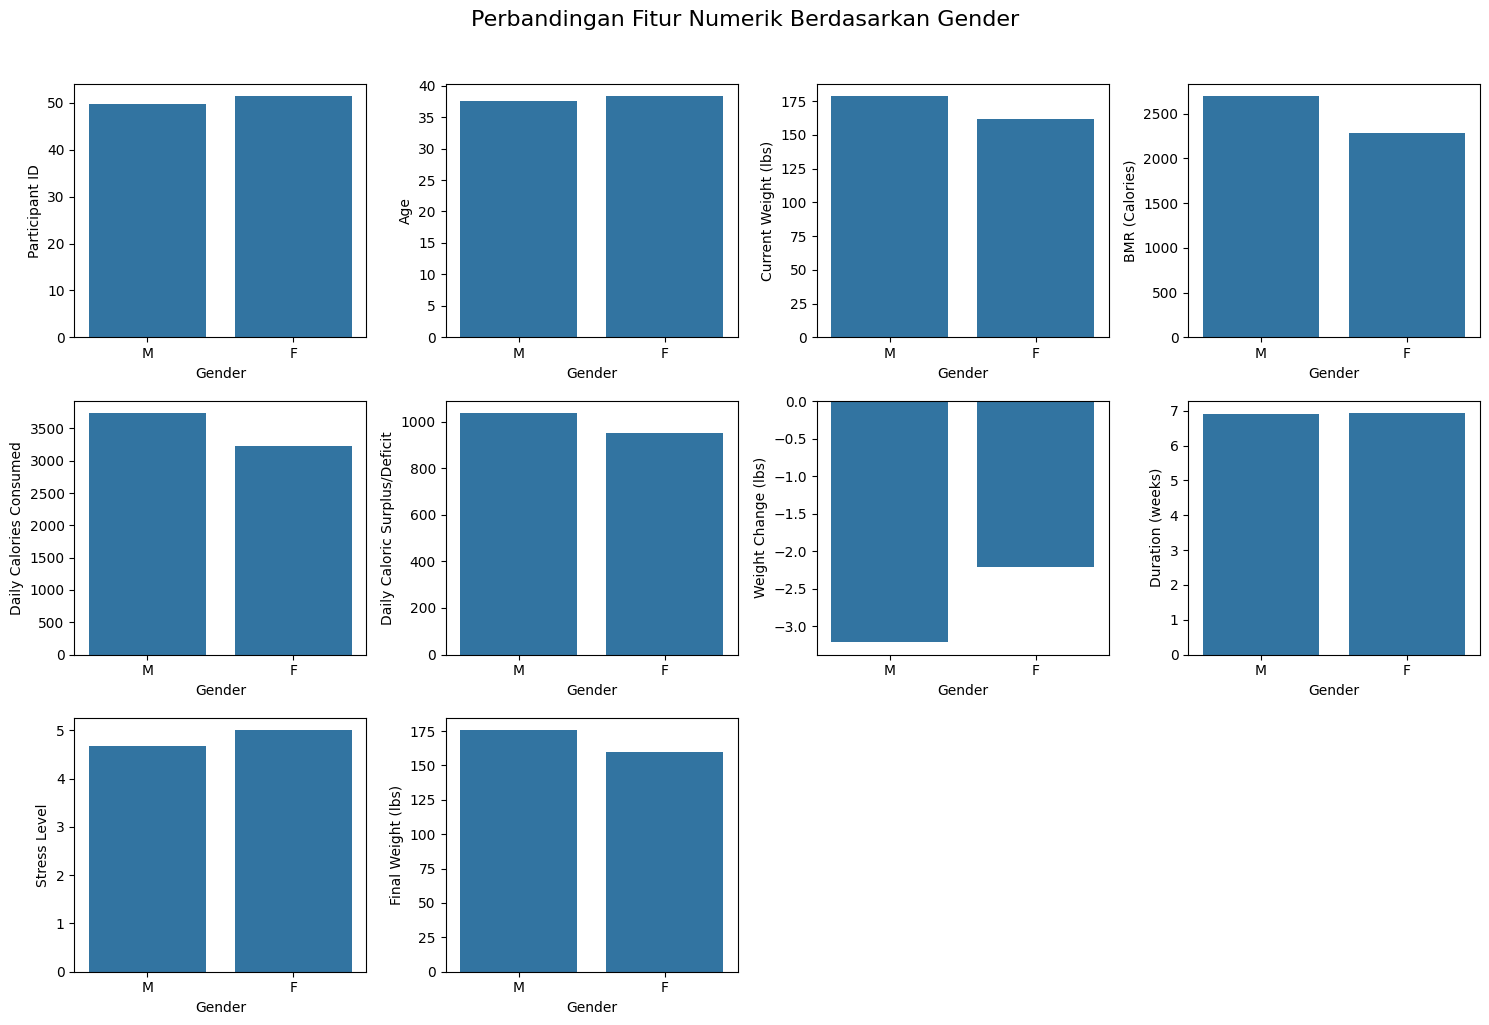

In [14]:
numeric_features = df.select_dtypes(include=['number']).columns
n_features = len(numeric_features)
n_cols = 4
n_rows = np.ceil(n_features / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.barplot(x='Gender', y=feature, data=df, ci=None, ax=axes[i])
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(feature)

for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.suptitle("Perbandingan Fitur Numerik Berdasarkan Gender", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

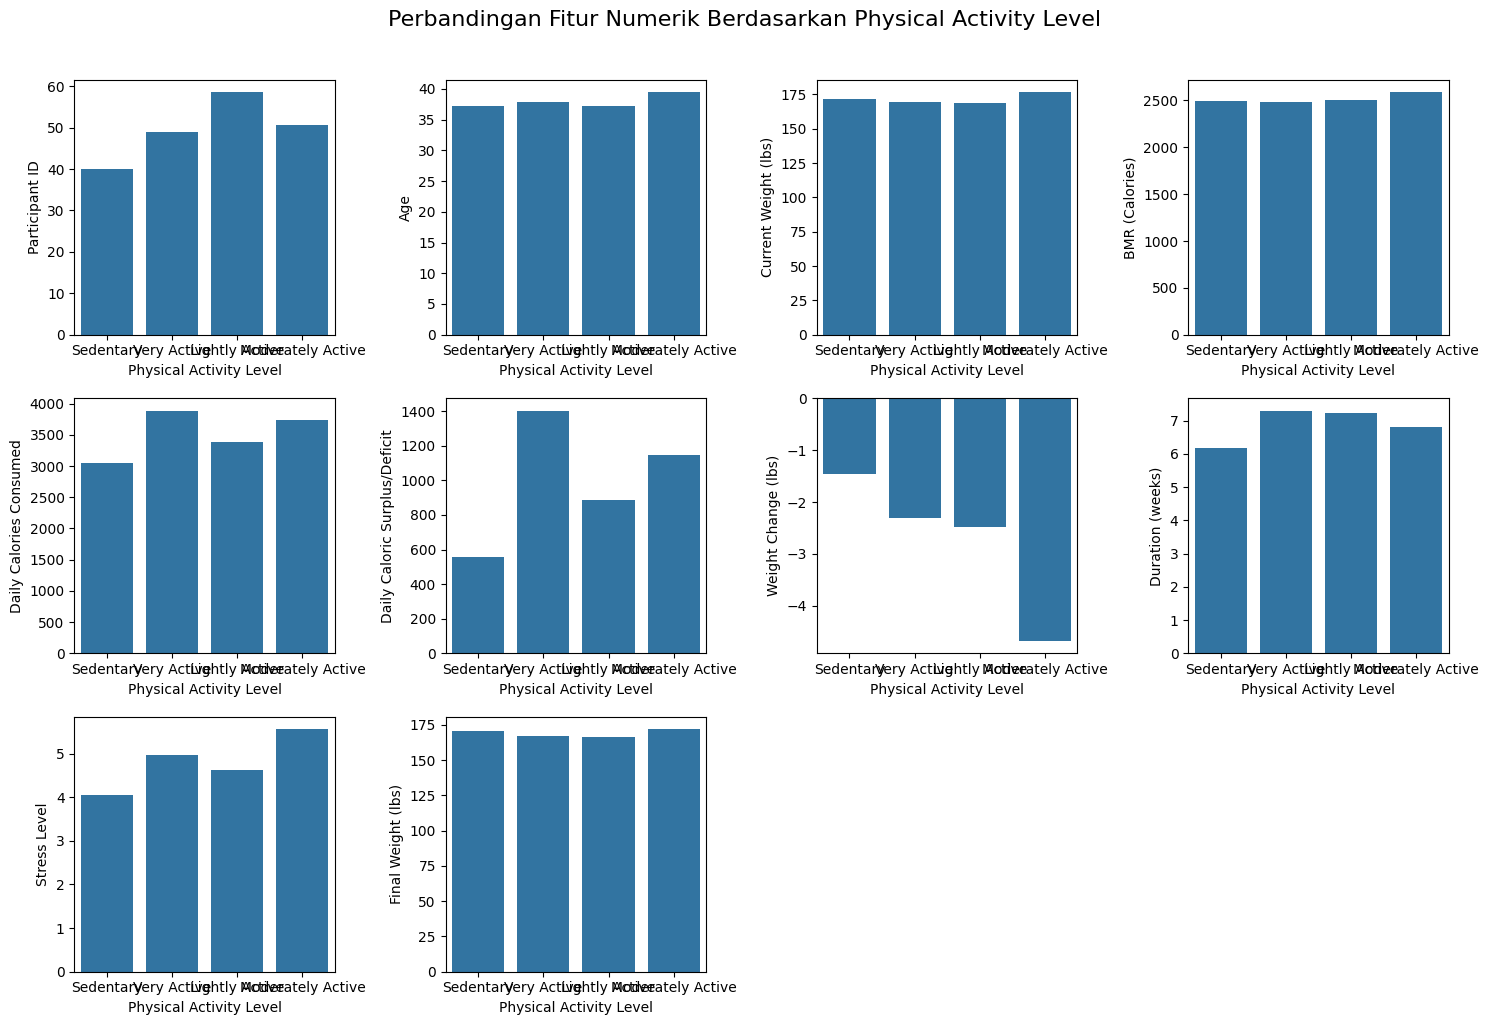

In [15]:
numeric_features = df.select_dtypes(include=['number']).columns
n_features = len(numeric_features)
n_cols = 4
n_rows = np.ceil(n_features / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.barplot(x='Physical Activity Level', y=feature, data=df, ci=None, ax=axes[i])
    axes[i].set_xlabel('Physical Activity Level')
    axes[i].set_ylabel(feature)

plt.suptitle("Perbandingan Fitur Numerik Berdasarkan Physical Activity Level", fontsize=16, y=1.02)
for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

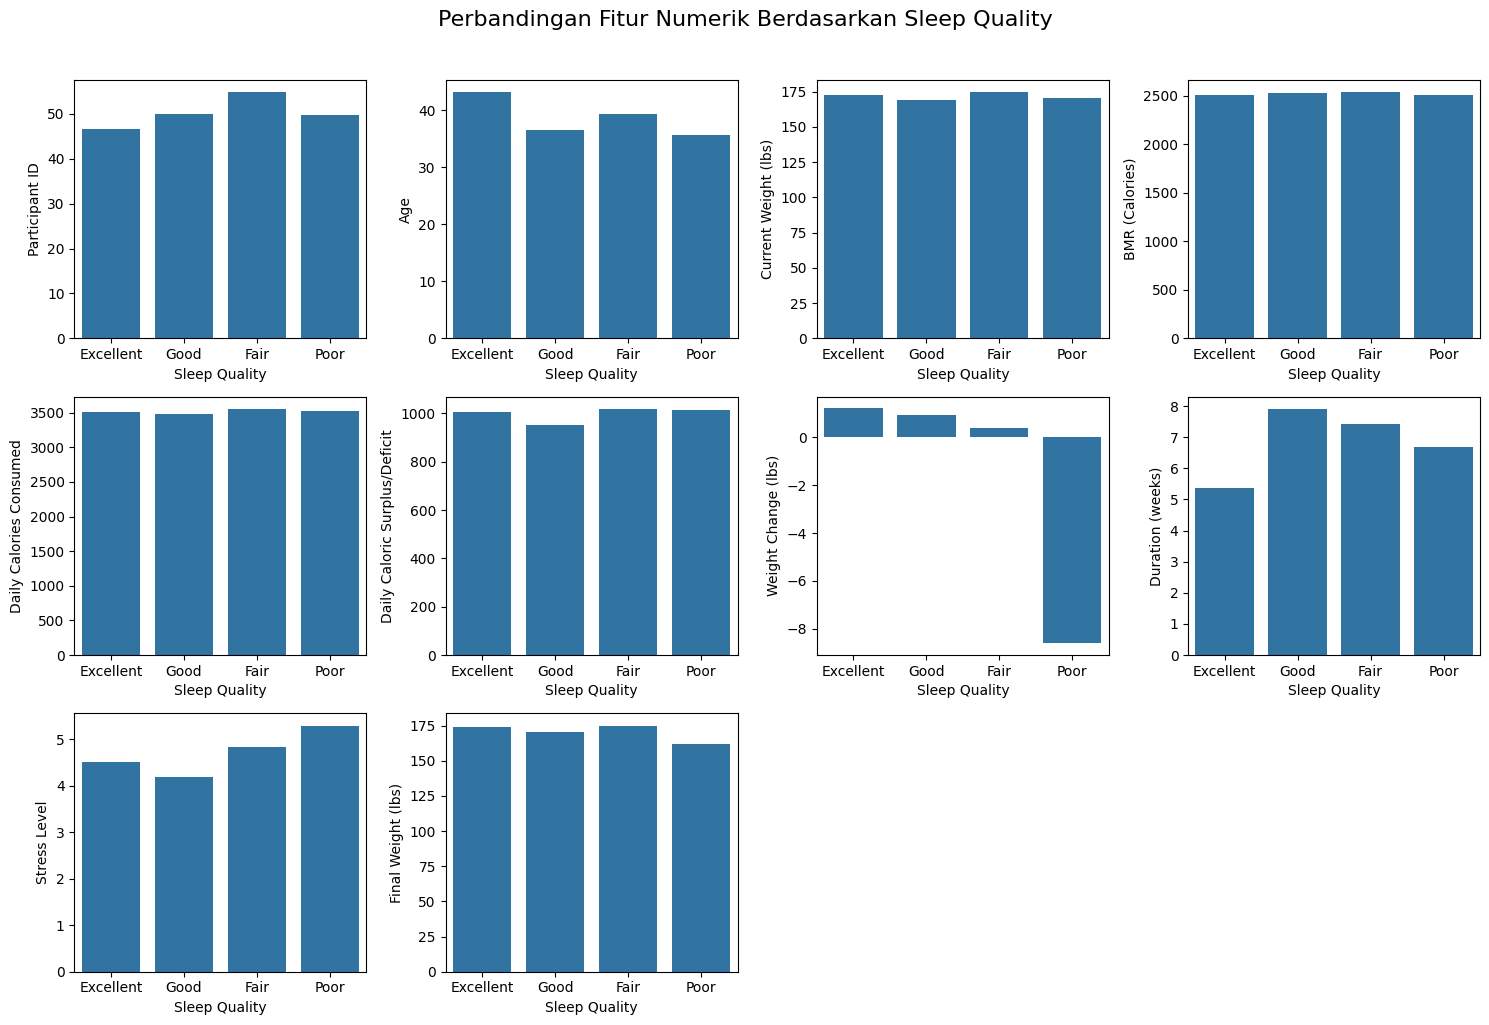

In [16]:
numeric_features = df.select_dtypes(include=['number']).columns
n_features = len(numeric_features)
n_cols = 4
n_rows = np.ceil(n_features / n_cols).astype(int)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.barplot(x='Sleep Quality', y=feature, data=df, ci=None, ax=axes[i])
    axes[i].set_xlabel('Sleep Quality')
    axes[i].set_ylabel(feature)

for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.suptitle("Perbandingan Fitur Numerik Berdasarkan Sleep Quality", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**KESIMPULAN HASIL EDA :**


* Terdapat 100 baris dan 13 kolom dari dataset.
* Tidak terdapat data yang kosong.
* Tidak terdapat duplikasi data.
* Hasil visualisasi skew didapat ada data yang normal (distribusi simetris), condong ke kiri (yang bernilai negatif).
* Visualisasi data yang bertipe objek.

**PREPROCESSING**

In [17]:
df = df.drop(columns=['Participant ID',
                      'Weight Change (lbs)',
                      'Final Weight (lbs)',
                      'BMR (Calories)',
                      'Age',
                      'Duration (weeks)']).dropna()

* Participant ID tidak digunakan karena tidak dibutuhkan.
* Weight Change tidak digunakan karena clustering yang diinginkan tidak mempertimbangkan perubahan berat badan.
* Final Weight tidak digunakan karena merupakan label.
* BMR tidak digunakan karena korelasinya tinggi.
* Age tidak digunakan karena tidak berpengaruh dalam clustering yang dilakukan.
* Duration tidak digunakan karena tidak menghitung berapa lamanya.

In [18]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Gender']
encoders = {}

for column in categorical_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

df['Physical Activity Level'] = df['Physical Activity Level'].replace({"Sedentary": 0, "Lightly Active": 1, "Moderately Active": 2, "Very Active": 3})
df['Sleep Quality'] = df['Sleep Quality'].replace({"Poor": 0, "Fair": 1, "Good": 2, "Excellent": 3})

**MENGUBAH DATA OBJECT **

* Encoder digunakan untuk mengubah gender dari female dan male (0,1).
* Encoder Physical Activity Level.
* Encoder Sleep Quality.

In [19]:
# Menentukan batas outlier menggunakan IQR
Q1 = df['Daily Calories Consumed'].quantile(0.25)
Q3 = df['Daily Calories Consumed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan median
df['Daily Calories Consumed'] = df['Daily Calories Consumed'].apply(
    lambda x: df['Daily Calories Consumed'].median() if x < lower_bound or x > upper_bound else x
)

**INTERQUARTILE RANGE**

* Digunakan untuk mencari median dari persebaran data.
* Dengan menggunakan Q1 sebagai lower bound dan Q3 menjadi upper bound.
* Data yang berada > 50 menjadi upper bound dan < 50 menjadi upper bound.

In [20]:
columns = df.columns
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [21]:
df.shape

(100, 7)

In [22]:
df.head()

,Gender,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Physical Activity Level,Sleep Quality,Stress Level
0,1.0,0.929088,0.954626,0.397391,0.000000,1.000000,0.625
1,0.0,0.473227,0.904392,0.796196,1.000000,1.000000,0.625
2,0.0,0.309696,0.343920,0.317120,0.000000,0.666667,0.250
3,0.0,0.329233,0.236915,0.175815,0.000000,0.333333,0.125
4,1.0,0.401592,0.628801,0.416576,0.333333,0.666667,0.000


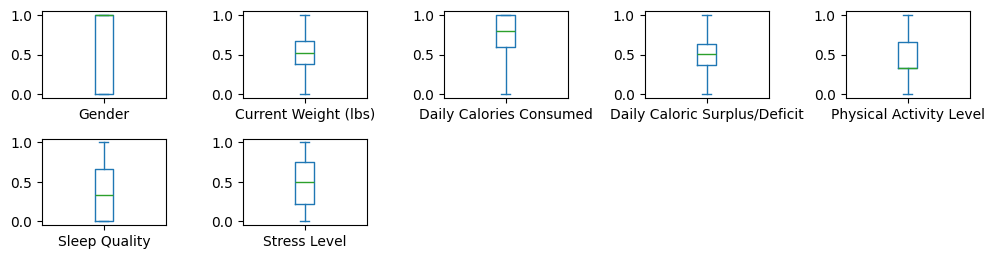

In [23]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(10, 5), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Clustering

Text(0.5, 1.0, 'Elbow Method')

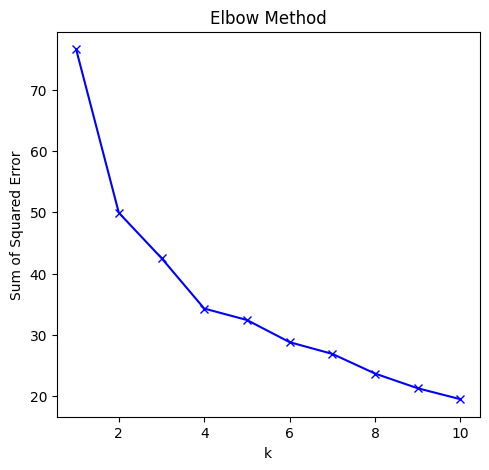

In [24]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')

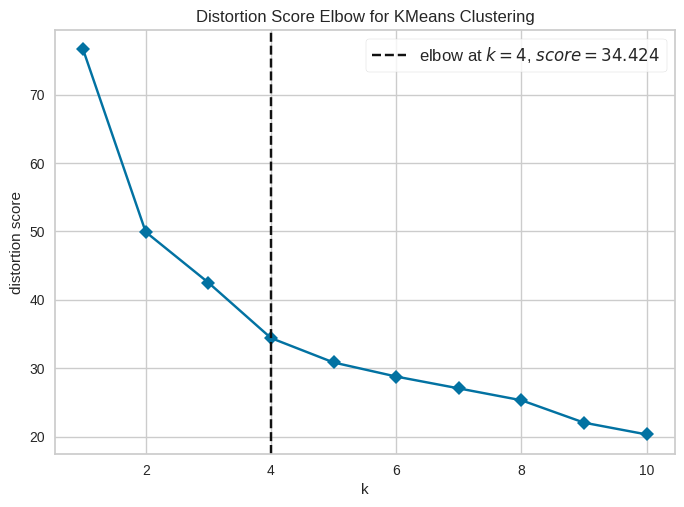

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(df)
visualizer.show()

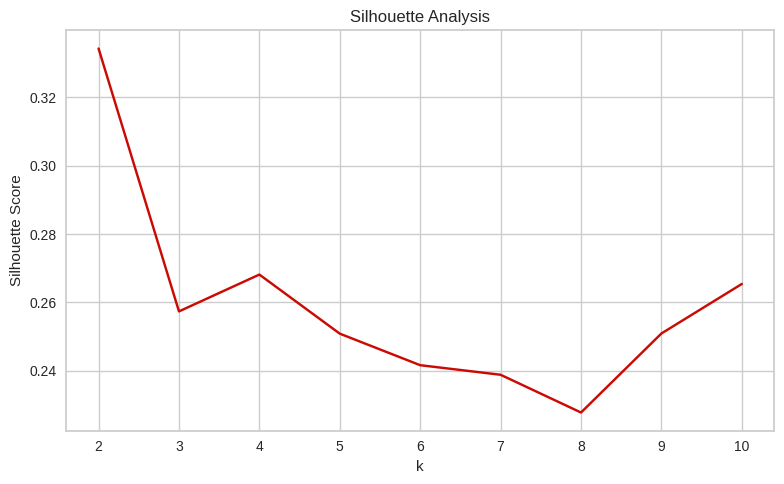

In [26]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

df['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

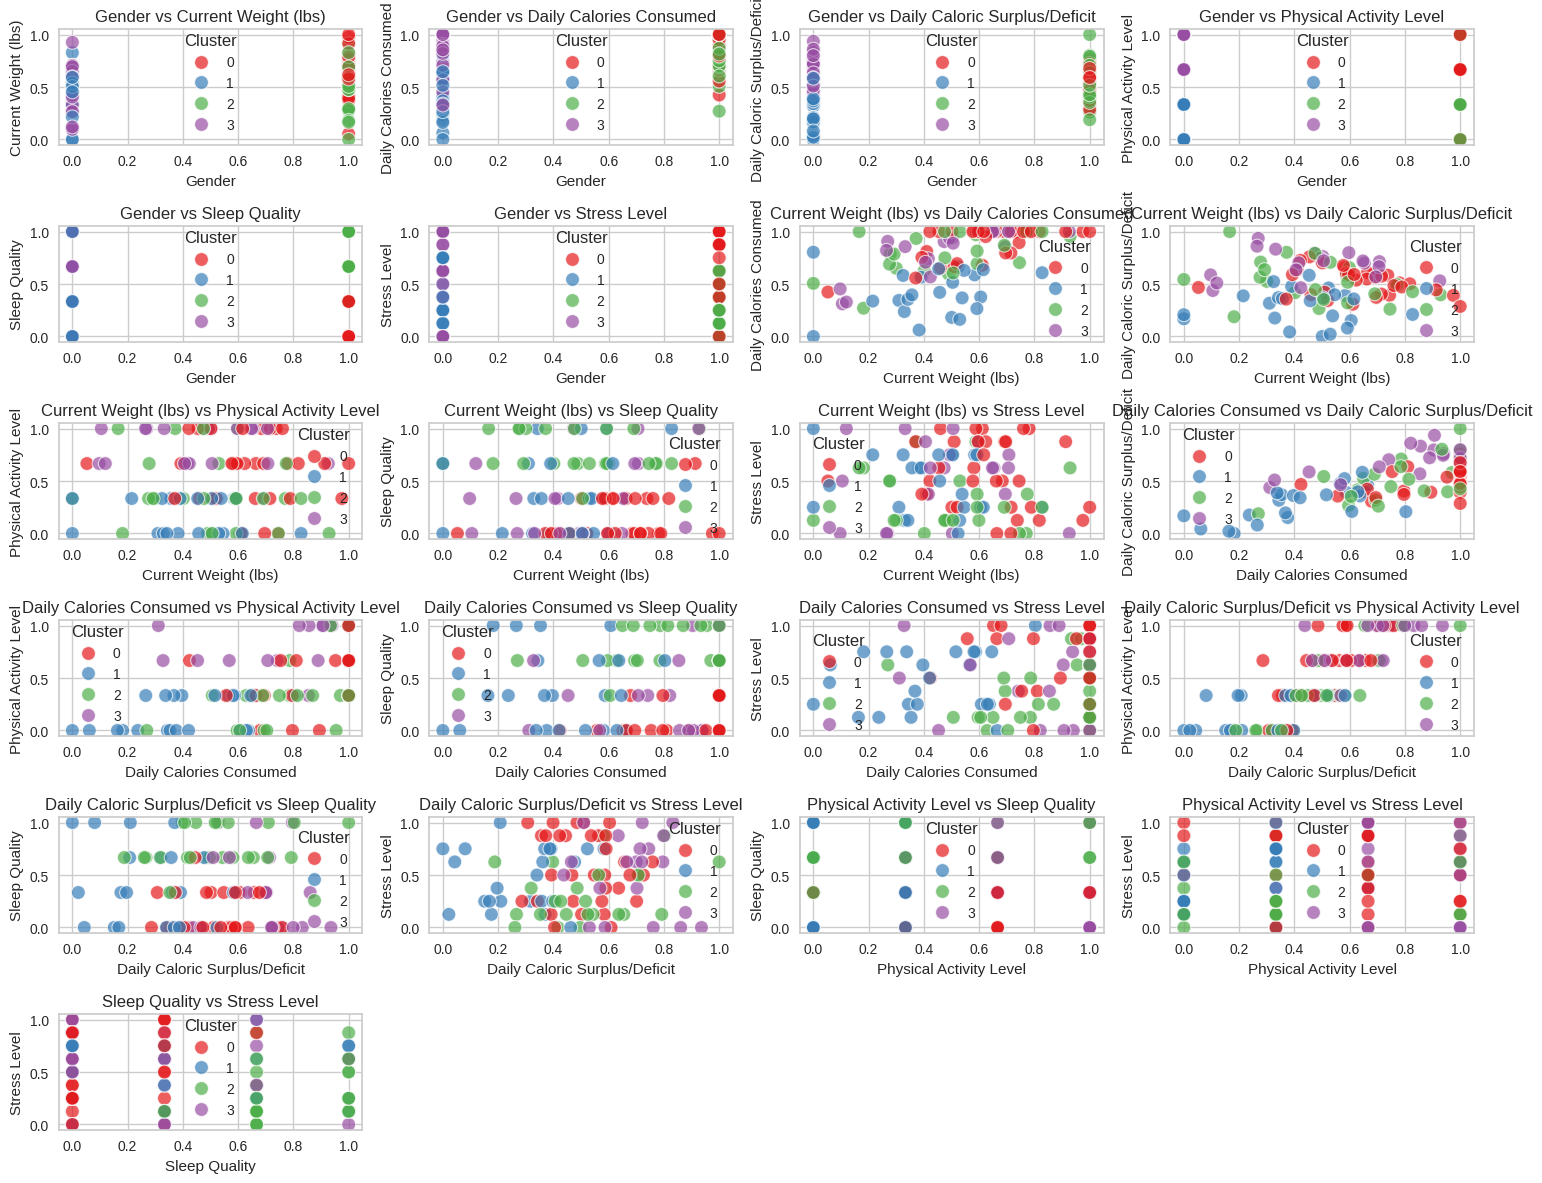

In [28]:
features = ['Gender', 'Current Weight (lbs)', 'Daily Calories Consumed',
            'Daily Caloric Surplus/Deficit', 'Physical Activity Level',
            'Sleep Quality', 'Stress Level']

pairings = list(combinations(features, 2))
n_plots = len(pairings)
n_cols = 4
n_rows = (n_plots // n_cols) + (n_plots % n_cols > 0)

plt.figure(figsize=(15, n_rows * 2))
for i, (feature1, feature2) in enumerate(pairings):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='Cluster', palette='Set1', s=100, alpha=0.7)
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.show()



Knowledge Discovery

In [29]:
clusters = df.iloc[:, -1]
data_asli = scaler.inverse_transform(df.iloc[:, :-1])
data_asli = pd.DataFrame(data_asli, columns=df.columns[:-1])
data_asli['Cluster'] = clusters

In [30]:
data_asli.head()

,Gender,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Physical Activity Level,Sleep Quality,Stress Level,Cluster
0,1.0,228.4,3916.0,813.7,0.0,3.0,6.0,2
1,0.0,165.4,3823.0,1547.5,3.0,3.0,6.0,3
2,0.0,142.8,2785.4,666.0,0.0,2.0,3.0,1
3,0.0,145.5,2587.3,406.0,0.0,1.0,2.0,1
4,1.0,155.5,3312.8,849.0,1.0,2.0,1.0,2


In [31]:
encoded_values = [0, 1]

for encoded_value in encoded_values:
    original_value = encoders['Gender'].inverse_transform([encoded_value])
    print(original_value)

['F']
['M']


In [32]:
for cluster in sorted(data_asli['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = data_asli[data_asli['Cluster'] == cluster]
    print(cluster_data.describe())


Cluster 0:
       Gender  Current Weight (lbs)  Daily Calories Consumed  \
count    33.0             33.000000                33.000000   
mean      1.0            186.424242              3813.418182   
std       0.0             26.178653               295.634991   
min       1.0            107.300000              2933.400000   
25%       1.0            170.400000              3623.300000   
50%       1.0            186.200000              4000.000000   
75%       1.0            202.000000              4000.000000   
max       1.0            238.200000              4000.000000   

       Daily Caloric Surplus/Deficit  Physical Activity Level  Sleep Quality  \
count                      33.000000                33.000000      33.000000   
mean                     1035.415152                 1.818182       0.424242   
std                       228.994015                 0.917011       0.560708   
min                       609.200000                 0.000000       0.000000   
25%        

**DENGAN ELBOW 4**

Kelompok 8

1) FARISAH GHASSANI HASYYATI - 24060122140137

2) FARID RAHMAN FADHILAH - 24060122140142

3) AURELLIA PUTRI BUDI ARSYANINGRUM - 24060122140168

4) NABILA NAJMA MANIKA - 24060122140172

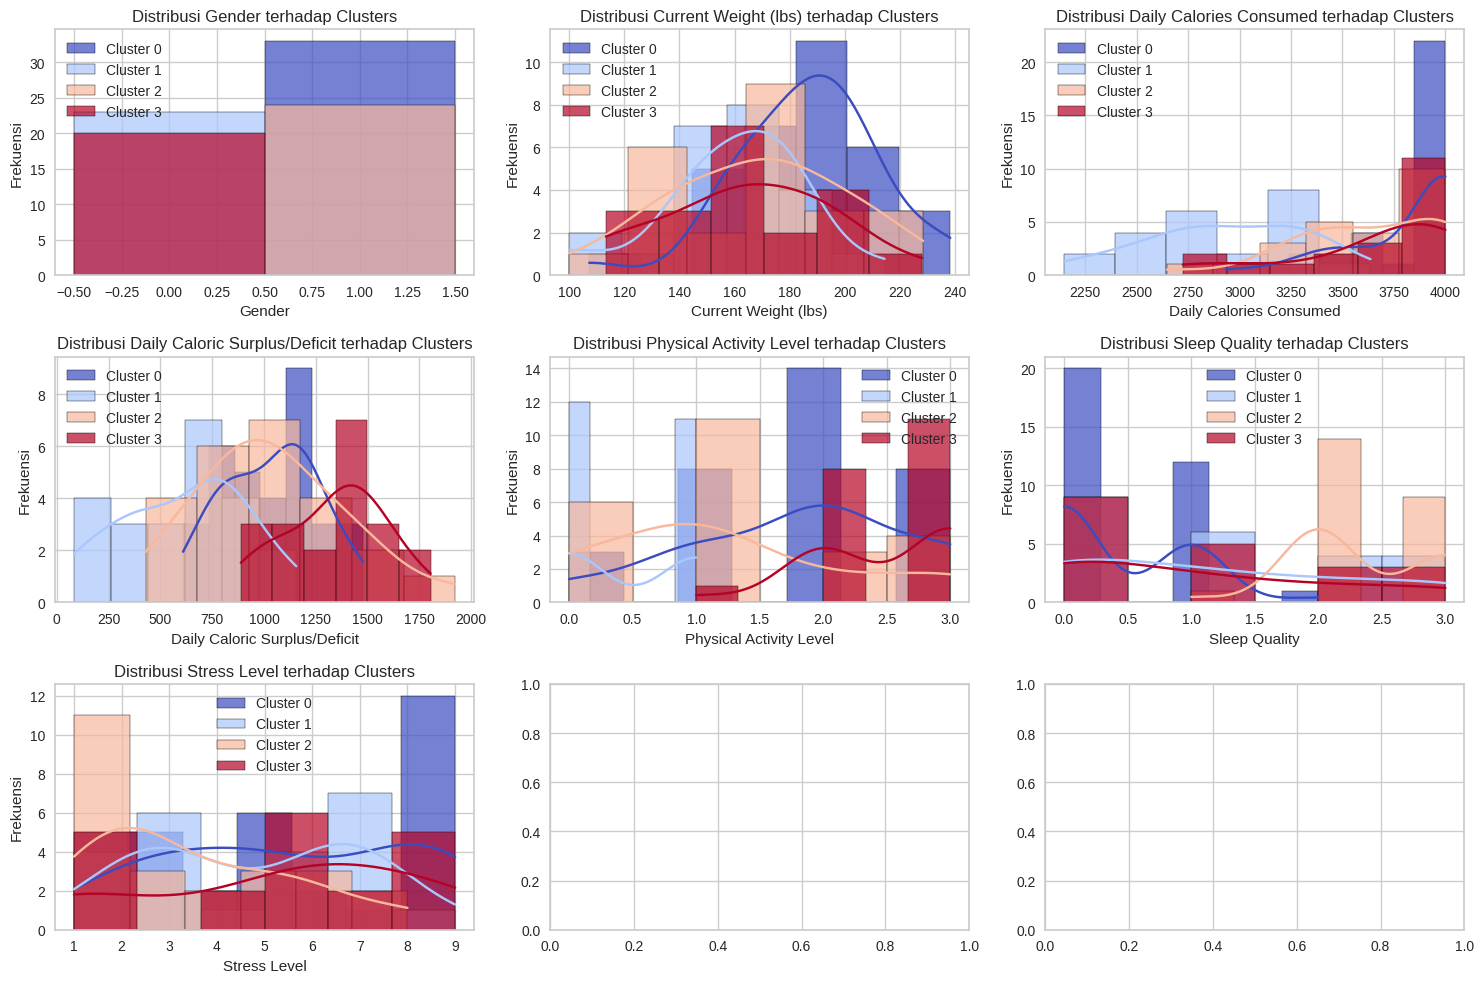

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    for cluster in sorted(data_asli['Cluster'].unique()):
        cluster_data = data_asli[data_asli['Cluster'] == cluster]
        sns.histplot(cluster_data[feature], kde=True, label=f'Cluster {cluster}',
                     color=sns.color_palette("coolwarm", as_cmap=True)(cluster / max(data_asli['Cluster'])),
                     alpha=0.7, ax=ax)

    ax.set_title(f'Distribusi {feature} terhadap Clusters')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frekuensi')
    ax.legend()

plt.tight_layout()
plt.show()


Simpan Model

In [34]:
with open('model-weight-change.pkl', 'wb') as f:
    pickle.dump({
        'encoder': encoders,
        'scaler': scaler,
        'kmeans': kmeans
    }, f)